## - To compare multiple files for files under a same directory

In [14]:
BaseDir    = '/Users/ranchu/ToDownload/VX_G15_003ms_CSSr_48X16E_133_CB_Hydro'
ProblemDir = '' # will be used as title
OptionDir  = ''

FileIndex       = [501,506] # need to be a list
nSpecies        = 2

# default
FileNameBase  = '/deleptonizationwave_hdf5_chk_'
Directory     = [BaseDir + ProblemDir + OptionDir] # can be different for a list
Directory     = Directory * len(FileIndex)

## Load library, search and read-in data ...

In [2]:
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# assemble filename
[fnum, FullFileNames] \
= fyiobasis.IO_AssembleFileName(Directory,FileNameBase,FileIndex)

# read data
[Times, Energy, Radius, ZerothMoment, FirstMoment, NumberDensity, EnergyDensity, \
            FluxDensity, AverageEnergy, AverageFluxFactor, Luminosity ] \
= fyio.IO_GetMoments_n_ComputeMeanVars(FullFileNames,Directory, nSpecies)

shape Times  [nfum] (3,)
shape Energy [nfum,nE] (3, 16)
shape Radius [nfum,nR] (3, 768)
shape NumbDe [nfum,nS,nR] (3, 2, 768)


# Making plots ...
## Rho-T-Ye plot:

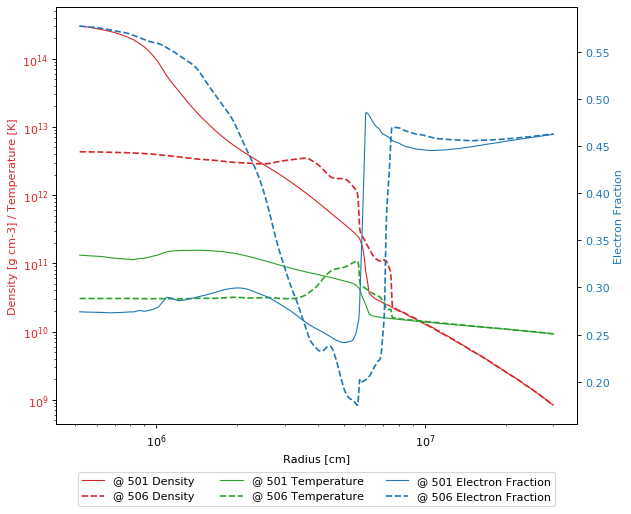

In [15]:
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# assemble filename
[fnum, FullFileNames] \
= fyiobasis.IO_AssembleFileName(Directory,FileNameBase,FileIndex)

%matplotlib inline
import flashytlib.plot as fyplt

#legends = ['@ {:.5f} s'.format(t) for t in Times]
legends = ['@ {:.0f}'.format(t) for t in FileIndex]

[Radius1, Density, Temperature, ElectronFraction] \
= fyplt.pltio_1D_Eos_multi(FullFileNames,\
                       optional_title=ProblemDir,\
                       optional_legend=legends)

### Relative Different in rho-T-Ye assuming same spatial points:

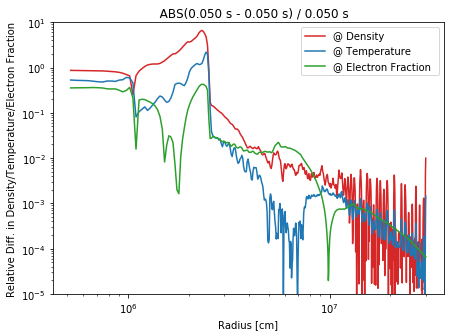

In [4]:
base_i  = 0
comp_i  = fnum-1

RelativeDiff_Rho = abs(Density[base_i] - Density[comp_i] )/Density[base_i]
RelativeDiff_T   = abs(Temperature[base_i] - Temperature[comp_i])/Temperature[base_i]
RelativeDiff_Ye  = abs(ElectronFraction[base_i]-ElectronFraction[comp_i])/ElectronFraction[base_i]

%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, sharex=True, sharey=True, gridspec_kw={'hspace': 0},\
                       figsize=(7, 5))

leg =' ABS('+ '{:.3f} s'.format(Times[base_i])\
+' - '+'{:.3f} s'.format(Times[comp_i]) + \
') / '+'{:.3f} s'.format(Times[base_i])

color = 'tab:red'
axs.plot(Radius1[0],RelativeDiff_Rho,\
         color=color,label='@ Density ')
color = 'tab:blue'
axs.plot(Radius1[0],RelativeDiff_T,\
         color=color,label='@ Temperature ')
color = 'tab:green'
axs.plot(Radius1[0],RelativeDiff_Ye,\
         color=color,label='@ Electron Fraction ')

axs.set_ylabel('Relative Diff. in Density/Temperature/Electron Fraction')
axs.legend(loc='best')
axs.set_xlabel('Radius [cm]')
axs.set_ylim([1e-5, 1e1])
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_title(ProblemDir + '  '+ leg)

plt.show()

## Luminosity:

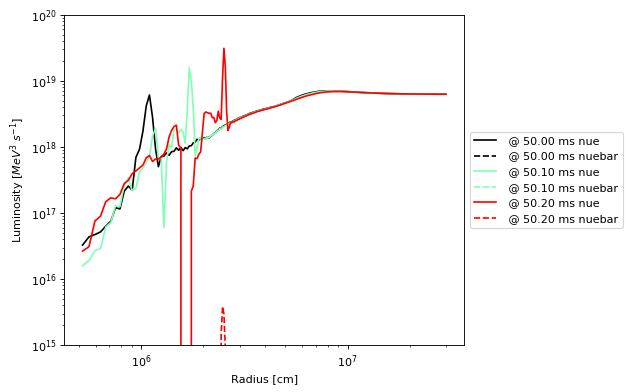

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = ['nue   ','nuebar']
LineType     = ['solid','dashed']
colors = cm.rainbow(np.linspace(0, 1, fnum)) # color for times/file
colors[0] = [0,0,0,1] # black the initial

fig, ax1 = plt.subplots(num=None, figsize=(6, 5), dpi=80, facecolor='w', edgecolor='k')
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel(r'Luminosity [$MeV^3$ $s^{-1}$]')

for ifile in range(fnum):
    for iS in range(nSpecies):
        ax1.plot(Radius[ifile],Luminosity[ifile][iS],\
                 linestyle=LineType[iS],color=colors[ifile],\
                 label=' @ {:.2f} ms '.format(Times[ifile]*1.e3)+labels[iS])
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1.0e15, 1.0e20])
ax1.tick_params(axis='y')
ax1.set_title(ProblemDir+OptionDir)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

### Relative difference in luminosity assuming same spatial points:

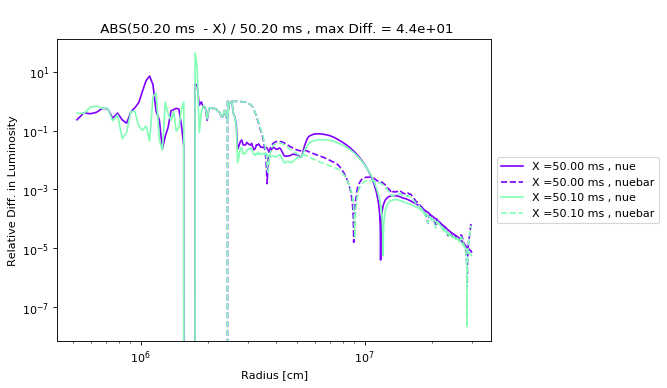

In [6]:
base_i  = fnum - 1

labels  = ['nue','nuebar']
colors = cm.rainbow(np.linspace(0, 1, fnum))
LineType     = ['solid','dashed']

RelativeDiff_Luminosity = ['?']*nSpecies


fig, axs = plt.subplots(1, sharex=True, sharey=True, dpi=80, gridspec_kw={'hspace': 0},\
                       figsize=(7, 5))


title =' ABS('+ '{:.2f} ms '.format(Times[base_i]*1.e3)\
    +' - '+ 'X' + \
    ') / '+ '{:.2f} ms '.format(Times[base_i]*1.e3)

totalMax = 0.0

for comp_i in range(0,base_i):
    for iS in range(nSpecies):
        RelativeDiff_Luminosity[iS]= \
        abs(Luminosity[base_i][iS]-Luminosity[comp_i][iS])\
        /Luminosity[base_i][iS]
        
        totalMax = max(np.amax(RelativeDiff_Luminosity[iS]),totalMax)

        leg = 'X ={:.2f} ms '.format(Times[comp_i]*1.e3) + ', '+labels[iS]

        axs.plot(Radius[base_i],RelativeDiff_Luminosity[iS],\
                      color=colors[comp_i],linestyle=LineType[iS], label=leg)

axs.set_ylabel('Relative Diff. in Luminosity')
axs.legend(loc='best')
    
axs.set_xlabel('Radius [cm]')
#axs.set_ylim([1e-5, 1e1])
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_title(ProblemDir + OptionDir + '  \n' + title \
              + ', max Diff. = {:.1e}'.format(totalMax))

axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Average energy and average flux factor:

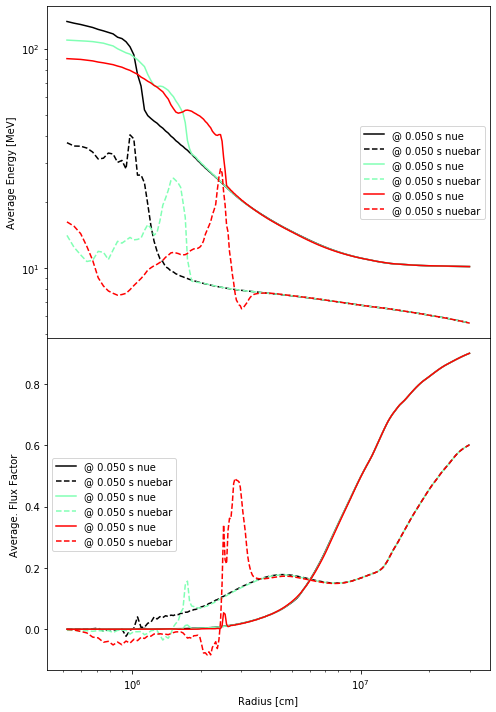

In [7]:
%matplotlib inline 
# notebook or inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

labels = ['nue','nuebar']
LineType     = ['solid','dashed']

# ============ figure 1 =============
colors = cm.rainbow(np.linspace(0, 1, fnum))
colors[0] = [0,0,0,1] # black the initial
LineTypes = ['solid','dashdot', 'dashed','dotted'] # rolling in use

#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))
# --- Number Density ---
axs[0].set_title(ProblemDir+OptionDir)
axs[1].set_xlabel('Radius [cm]')
axs[0].set_ylabel('Average Energy [MeV]')

for ifi in range(fnum):
    for iS in range(nSpecies):
        axs[0].plot(Radius[ifi],AverageEnergy[ifi][iS], \
                    linestyle=LineType[iS],color=colors[ifi],\
                    label='@ {:.3f} s '.format(Times[ifi])+labels[iS])

axs[0].set_yscale('log')
axs[0].set_xscale('log')

# --- Average Flux Factor ---
axs[1].set_ylabel('Average. Flux Factor')
axs[1].set_yscale('linear')
for ifi in range(fnum):
    for iS in range(nSpecies):
        axs[1].plot(Radius[ifi],AverageFluxFactor[ifi][iS], \
                    linestyle=LineType[iS],color=colors[ifi],\
                    label='@ {:.3f} s '.format(Times[ifi])+labels[iS])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
axs[0].legend(loc='right')
axs[1].legend(loc='center left')
#plt.show()
#plt.savefig(Directory[0]+'/IfStationary.png')



### Relative difference in average energy and average flux factor:

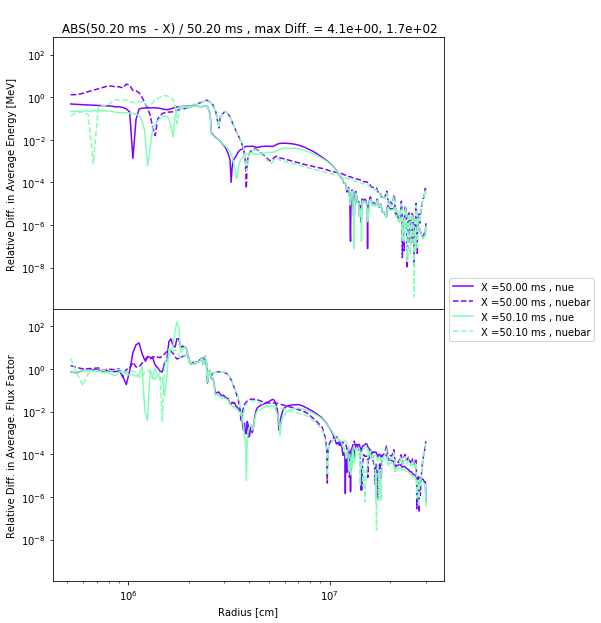

In [8]:
base_i  = fnum - 1

RelativeDiff_AverageEnergy = nSpecies * ['?']
RelativeDiff_AverageFluxFactor = nSpecies * ['?']

totalMax_J = 0.0
totalMax_H = 0.0

import matplotlib.pyplot as plt

LineType     = ['solid','dashed']
colors = cm.rainbow(np.linspace(0, 1, fnum))

fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for comp_i in range(0,base_i):
    for iS in range(nSpecies):
        RelativeDiff_AverageEnergy[iS] = \
        abs(AverageEnergy[base_i][iS]-AverageEnergy[comp_i][iS])\
        /AverageEnergy[base_i][iS]
        
        RelativeDiff_AverageFluxFactor[iS] = \
        abs(AverageFluxFactor[base_i][iS]-AverageFluxFactor[comp_i][iS])\
        /abs(AverageFluxFactor[base_i][iS])
        
        totalMax_J = max(np.amax(RelativeDiff_AverageEnergy[iS]),totalMax_J)
        totalMax_H = max(np.amax(RelativeDiff_AverageFluxFactor[iS]),totalMax_H)
        
        # --- Number Density ---
        axs[0].set_xlabel('Radius [cm]')
        axs[0].set_ylabel('Relative Diff. in Average Energy [MeV]')

        leg = 'X ={:.2f} ms '.format(Times[comp_i]*1.e3) + ', '+labels[iS]

        axs[0].plot(Radius[base_i],RelativeDiff_AverageEnergy[iS],\
                        linestyle=LineType[iS], color=colors[comp_i],label=leg)
        axs[0].set_yscale('log')
        axs[0].tick_params(axis='y')
    
        # --- Average Flux Factor --- 
        axs[1].set_ylabel('Relative Diff. in Average. Flux Factor')
        axs[1].plot(Radius[base_i],RelativeDiff_AverageFluxFactor[iS],\
                        linestyle=LineType[iS], color=colors[comp_i],label=leg)
        axs[1].set_yscale('log')    
        axs[1].tick_params(axis='y')
 
#axs[0].set_ylim([1.0e-5, 1.0e1]) 
axs[1].set_xscale('log')
axs[1].set_xlabel('Radius [cm]')
axs[0].legend(loc='best')

title =' ABS('+ '{:.2f} ms '.format(Times[base_i]*1.e3)\
    +' - '+ 'X' + \
    ') / '+ '{:.2f} ms '.format(Times[base_i]*1.e3)

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.0))

axs[0].set_title(ProblemDir +OptionDir + '  \n' + title \
              + ', max Diff. = {:.1e}, {:.1e}'.format(totalMax_J,totalMax_H))
plt.show()

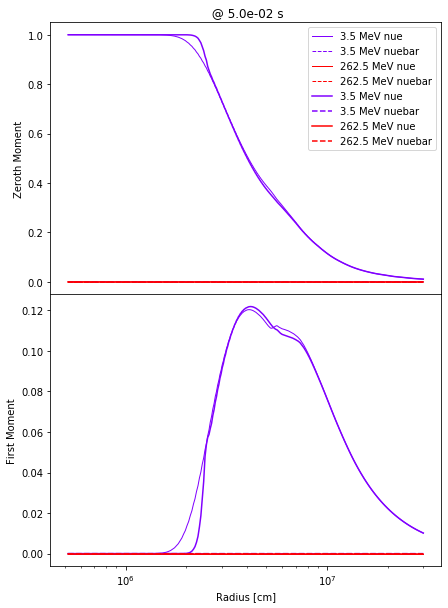

In [9]:
base_i  = 0
comp_i  = fnum-1

# Lowest energetic & Highest energetic J / H vs Radius
iEs = [0, len(Energy[0])-1]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType     = ['solid','dashed']
labels = ['nue','nuebar']
LineWeights = [1.0,1.5,1.5]*fnum


colors = cm.rainbow(np.linspace(0, 1, len(Energy[0])))

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for iE1 in iEs:
    for iS in range(nSpecies):
        axs[0].plot(Radius[base_i],ZerothMoment[base_i][iS][:,iE1],\
                    linestyle=LineType[iS],color=colors[iE1],\
                    linewidth=LineWeights[base_i], \
                    label= '%.1f MeV '%(Energy[base_i][iE1])+labels[iS])
        axs[1].plot(Radius[base_i],FirstMoment[base_i][iS][:,iE1],\
                    linestyle=LineType[iS],color=colors[iE1],\
                    linewidth=LineWeights[base_i], \
                    label= '%.1f MeV '%(Energy[base_i][iE1])+labels[iS])

for iE1 in iEs:
    for iS in range(nSpecies):
        axs[0].plot(Radius[comp_i],ZerothMoment[comp_i][iS][:,iE1],\
                    linestyle=LineType[iS],color=colors[iE1],\
                    linewidth=LineWeights[comp_i], \
                    label= '%.1f MeV '%(Energy[comp_i][iE1])+labels[iS])
        axs[1].plot(Radius[comp_i],FirstMoment[comp_i][iS][:,iE1],\
                    linestyle=LineType[iS],color=colors[iE1],\
                    linewidth=LineWeights[comp_i], \
                    label= '%.1f MeV '%(Energy[comp_i][iE1])+labels[iS])

axs[0].set_ylabel('Zeroth Moment')
axs[1].set_ylabel('First Moment')
axs[1].set_xlabel('Radius [cm]')
axs[1].set_xscale('log')
axs[0].legend(loc='best')

axs[0].set_title(ProblemDir+' @ {:.1e} s'.format(Times[0]))
plt.show()

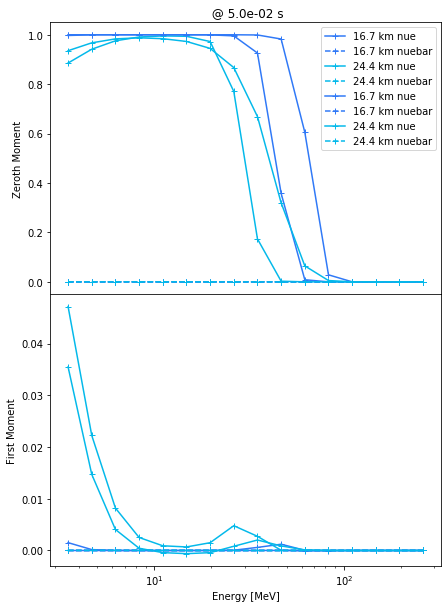

In [10]:
base_i  = 0
comp_i  = fnum-1

# J / H in spectrum for given radius
iXs = [30,50]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType    = ['solid','dashed']
labels      = ['nue','nuebar']
LineWeights = [1.5,0.8,1.5]*fnum
LineMarker  = ['+','.']*fnum

colors = cm.rainbow(np.linspace(0, 4, len(Radius[0])))

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for iX in iXs:
    for iS in range(nSpecies):
        axs[0].plot(Energy[base_i],ZerothMoment[base_i][iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    linewidth=LineWeights[base_i], \
                    marker=LineMarker[base_i], \
                    label= '%.1f km '%(Radius[base_i][iX]*1.0e-5)+labels[iS])
        axs[1].plot(Energy[base_i],FirstMoment[base_i][iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    linewidth=LineWeights[base_i], \
                    marker=LineMarker[base_i], \
                    label= '%.1f km '%(Radius[base_i][iX]*1.0e-5)+labels[iS])

for iX in iXs:
    for iS in range(nSpecies):
        axs[0].plot(Energy[comp_i],ZerothMoment[comp_i][iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    linewidth=LineWeights[comp_i], \
                    marker=LineMarker[comp_i], \
                    label= '%.1f km '%(Radius[comp_i][iX]*1.0e-5)+labels[iS])
        axs[1].plot(Energy[comp_i],FirstMoment[comp_i][iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    linewidth=LineWeights[comp_i], \
                    marker=LineMarker[comp_i], \
                    label= '%.1f km '%(Radius[comp_i][iX]*1.0e-5)+labels[iS])
        
axs[0].set_ylabel('Zeroth Moment')
axs[1].set_ylabel('First Moment')
axs[1].set_xlabel('Energy [MeV]')
axs[1].set_xscale('log')
axs[0].legend(loc='best')

axs[0].set_title(ProblemDir+' @ {:.1e} s'.format(Times[0]))
plt.show()